## PYTHON CREDIT CARD SEGMENTATION CASE STUDY - shubhamjainxyz@gmail.com

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
path = 'C:/Users/shubh/Desktop/ALABS PYTHON CASE STUDIES/FINAL/4. Segmentation of Credit Card Customers/'

### IMPORTING DATASET

In [3]:
credit_data = pd.read_csv(path + 'CC_GENERAL.csv')

In [4]:
credit_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
credit_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### REMOVING CUST_ID VARIABLE FROM DATASET SINCE IT IS USELESS FOR OUR MODELLING 

In [7]:
credit_data.drop(columns = ['CUST_ID'], inplace = True)

### UDF TO CREATE UNIVARIATE ANALYSIS FOR NUMERICAL FEATURES

In [13]:
def univ_analysis(x) :
    
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), 
                      x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.1), x.quantile(0.25), 
                      x.quantile(0.5), x.quantile(0.75), x.quantile(0.9), x.quantile(0.95), x.quantile(0.99), x.max()],
                      index = ['N', 'NMISS', 'TOTAL SUM', 'MEAN', 'MEDIAN', 'STDEV', 'VAR', 'MIN', 'P1', 'P5', 'P10', 'P25',
                               'P50', 'P75', 'P90', 'P95', 'P99', 'MAX'])

### CREATING UNIVARIATE ANALYSIS FOR CREDIT DATA

In [9]:
univ_analysis = credit_data.apply(univ_analysis).T
univ_analysis.to_csv(path + 'univ_analysis.csv')
univ_analysis

,N,NMISS,TOTAL SUM,MEAN,MEDIAN,STDEV,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.00000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.50000


### APPLYING OUTIER TREATMENT ON CREDIT_DATA

In [10]:
credit_data = credit_data.apply(lambda x : x.clip(lower = x.quantile(0.01), 
                                                  upper = x.quantile(0.99)))
credit_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6.0,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6.0,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5.0,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0.0,500.0,52.549959,55.755628,0.250000,6


In [14]:
# AGAIN APPLYING UNIVARIATE ANALYSIS ON CREDIT_DATA
univ_analysis2 = credit_data.apply(univ_analysis).T
univ_analysis2.to_csv(path + 'univ_analysis2.csv')
univ_analysis2

,N,NMISS,TOTAL SUM,MEAN,MEDIAN,STDEV,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.379237e+07,1541.046707,873.385231,1966.597484,3.867506e+06,0.065101,0.065248,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9337.094398,9338.804814
BALANCE_FREQUENCY,8950.0,0.0,7.858846e+03,0.878083,1.000000,0.234032,5.477084e-02,0.090909,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,0.0,8.379252e+06,936.229237,361.280000,1525.185179,2.326190e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8961.796200,8977.290000
ONEOFF_PURCHASES,8950.0,0.0,4.801619e+06,536.493774,38.000000,1096.913512,1.203219e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6684.195482,6689.898200
INSTALLMENTS_PURCHASES,8950.0,0.0,3.441260e+06,384.498368,89.000000,676.271068,4.573426e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3885.853155,3886.240500
CASH_ADVANCE,8950.0,0.0,8.376493e+06,935.920972,0.000000,1775.774147,3.153374e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9584.005151,9588.163357
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.199449e+03,0.134017,0.000000,0.195550,3.823977e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,0.833333


### APPLYING MISSING VALUE TREATMENT

In [15]:
# REPLACING MISSING VALUE OF CREDIT_LIMIT WITH 100 UNITS. AFTER VISUAL INSPECTION OF THE OBSERVATION WITH MISSING VALUE FOR 
# CREDIT_LIMIT I FOUND THAT THIS CUSTOMER HAS VERY LOW USAGE OF CREDIT CARD, HENCE REPLACING IT'S MISSING CREDIT_LIMIT WITH 100.

credit_data.CREDIT_LIMIT.fillna(100, inplace = True)

In [16]:
# REPLACING MISSING VALUE OF MINIMUM_PAYMENTS WITH 10% OF BALANCE VALUE

credit_data.MINIMUM_PAYMENTS.fillna(credit_data.BALANCE*0.1, inplace = True)

### DERIVING INTELLIGENT KPI's

In [17]:
# MONTHLY AVERAGE PURCHASE
credit_data['MONTHLY_AVG_PURCHASE'] = credit_data['PURCHASES']/credit_data['TENURE']

In [18]:
# MONTHLY AVERAGE CASH ADVANCE
credit_data['MONTHLY_AVG_CASH_ADVANCE'] = credit_data['CASH_ADVANCE']/credit_data['TENURE']

In [19]:
# LIMIT USAGE
credit_data['LIMIT_USAGE'] = credit_data['BALANCE']/credit_data['CREDIT_LIMIT']

In [20]:
credit_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,LIMIT_USAGE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,7500.0,0.000000,166.667054,0.000000,12,124.916667,17.149001,0.222223
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429


In [21]:
credit_data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'MONTHLY_AVG_PURCHASE', 'MONTHLY_AVG_CASH_ADVANCE',
       'LIMIT_USAGE'],
      dtype='object')

### CORRELATION MATRIX

In [22]:
corr_matrix = credit_data.corr()
corr_matrix.to_csv(path + 'corr_matrix.csv')

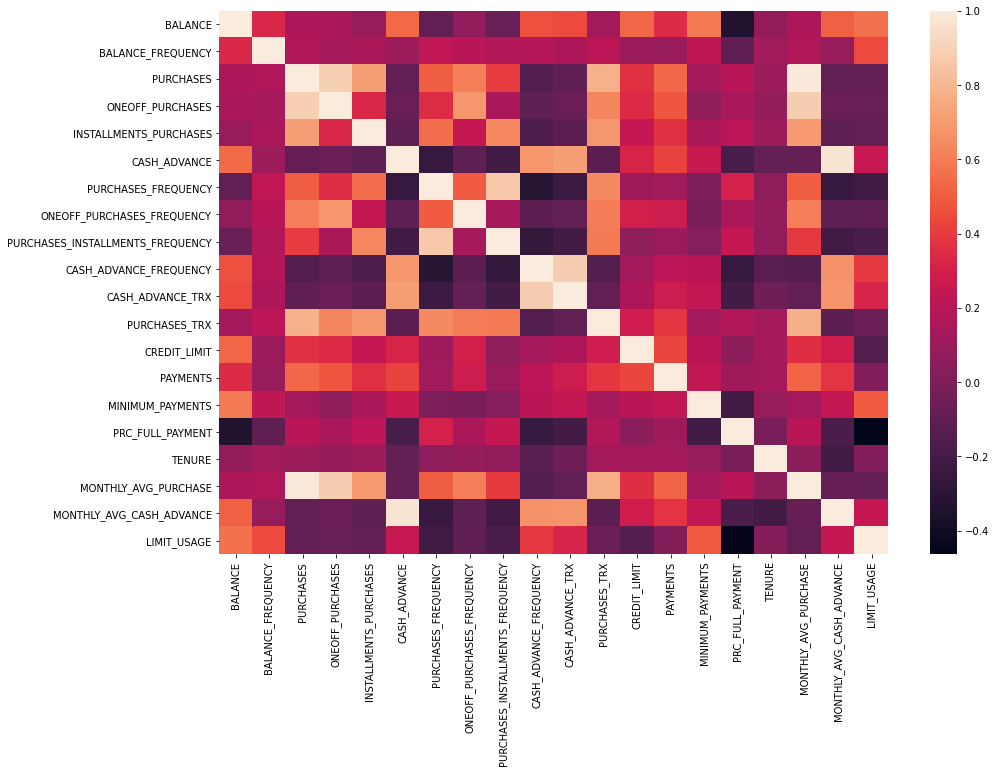

In [23]:
plt.figure(figsize = (15, 10))
sns.heatmap(credit_data.corr())
plt.show()

### STANDARDIZING THE DATA TO BRING ALL FEATURES TO A SIMILAR SCALE

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()

In [26]:
credit_data_scaled = pd.DataFrame(sc.fit_transform(credit_data))
credit_data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.762856,-0.255968,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,-0.557505,-0.579714,-0.978250,-0.642945,-0.477427,-0.525551,0.36068,-0.559583,-0.510509,-0.979789
1,0.844867,0.132501,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,0.166685,-0.675130,0.711335,1.089747,0.261264,0.234227,0.36068,-0.620854,2.704783,0.205517
2,0.485181,0.520970,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,-0.557505,-0.102638,0.852134,-0.456289,-0.091167,-0.525551,0.36068,-0.124282,-0.510509,-0.149593
3,0.063882,-1.032906,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,-0.376457,-0.627422,0.852134,-0.732573,-0.455922,-0.525551,0.36068,0.341886,-0.407813,-0.463887
4,-0.367830,0.520970,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,-0.557505,-0.627422,-0.921931,-0.431298,-0.394057,-0.525551,0.36068,-0.610578,-0.510509,0.842658


In [27]:
credit_data_scaled.columns = credit_data.columns

In [28]:
credit_data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,LIMIT_USAGE
0,-0.762856,-0.255968,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,-0.557505,-0.579714,-0.978250,-0.642945,-0.477427,-0.525551,0.36068,-0.559583,-0.510509,-0.979789
1,0.844867,0.132501,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,0.166685,-0.675130,0.711335,1.089747,0.261264,0.234227,0.36068,-0.620854,2.704783,0.205517
2,0.485181,0.520970,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,-0.557505,-0.102638,0.852134,-0.456289,-0.091167,-0.525551,0.36068,-0.124282,-0.510509,-0.149593
3,0.063882,-1.032906,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,-0.376457,-0.627422,0.852134,-0.732573,-0.455922,-0.525551,0.36068,0.341886,-0.407813,-0.463887
4,-0.367830,0.520970,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,-0.557505,-0.627422,-0.921931,-0.431298,-0.394057,-0.525551,0.36068,-0.610578,-0.510509,0.842658


### FEATURE REDUCTION USING PCA

In [29]:
from sklearn.decomposition import PCA

In [30]:
pc = PCA(n_components = 20).fit(credit_data_scaled)

In [31]:
pc.explained_variance_

array([5.88441570e+00, 4.65245248e+00, 1.82597783e+00, 1.46501876e+00,
       1.13450024e+00, 9.52770503e-01, 8.07186222e-01, 7.03583215e-01,
       5.69369004e-01, 5.16264227e-01, 3.38762311e-01, 3.15345785e-01,
       3.07401285e-01, 2.07195805e-01, 1.32213790e-01, 1.05585225e-01,
       4.16992531e-02, 1.93447896e-02, 1.81831022e-02, 4.96535970e-03])

In [32]:
pc.explained_variance_.sum()

20.00223488657951

In [33]:
pc.explained_variance_ratio_

array([2.94187911e-01, 2.32596632e-01, 9.12886906e-02, 7.32427536e-02,
       5.67186741e-02, 4.76332024e-02, 4.03548017e-02, 3.51752301e-02,
       2.84652693e-02, 2.58103272e-02, 1.69362230e-02, 1.57655275e-02,
       1.53683469e-02, 1.03586328e-02, 6.60995088e-03, 5.27867137e-03,
       2.08472970e-03, 9.67131407e-04, 9.09053530e-04, 2.48240245e-04])

In [34]:
# CUMULATIVE VARIANCE EXPLAINED
var = np.round( np.cumsum( pc.explained_variance_ratio_ * 100 ), 2 )
var

array([ 29.42,  52.68,  61.81,  69.13,  74.8 ,  79.57,  83.6 ,  87.12,
        89.97,  92.55,  94.24,  95.82,  97.35,  98.39,  99.05,  99.58,
        99.79,  99.88,  99.98, 100.  ])

In [35]:
pd.DataFrame({'Eigen_Values': pc.explained_variance_, 'VAR': np.round(pc.explained_variance_ratio_*100, 2), 
                  'Cumm_VAR': var}, index = range(1, 21))

,Eigen_Values,VAR,Cumm_VAR
1,5.884416,29.42,29.42
2,4.652452,23.26,52.68
3,1.825978,9.13,61.81
4,1.465019,7.32,69.13
5,1.134500,5.67,74.80
6,0.952771,4.76,79.57
7,0.807186,4.04,83.60
8,0.703583,3.52,87.12
9,0.569369,2.85,89.97
10,0.516264,2.58,92.55


In [36]:
# CHOOSING THE NUMBER OF COMPONENTS TO BE 6 SINCE CUMULATIVE VARIANCE EXPLAINED > 75%
pc_final = PCA( n_components = 6 ).fit( credit_data_scaled )

In [37]:
pc_final.explained_variance_

array([5.8844157 , 4.65245248, 1.82597783, 1.46501876, 1.13450024,
       0.9527705 ])

In [38]:
pc_final.explained_variance_ratio_

array([0.29418791, 0.23259663, 0.09128869, 0.07324275, 0.05671867,
       0.0476332 ])

In [39]:
credit_data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,LIMIT_USAGE
0,-0.762856,-0.255968,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,-0.557505,-0.579714,-0.978250,-0.642945,-0.477427,-0.525551,0.36068,-0.559583,-0.510509,-0.979789
1,0.844867,0.132501,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,0.166685,-0.675130,0.711335,1.089747,0.261264,0.234227,0.36068,-0.620854,2.704783,0.205517
2,0.485181,0.520970,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,-0.557505,-0.102638,0.852134,-0.456289,-0.091167,-0.525551,0.36068,-0.124282,-0.510509,-0.149593
3,0.063882,-1.032906,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,-0.376457,-0.627422,0.852134,-0.732573,-0.455922,-0.525551,0.36068,0.341886,-0.407813,-0.463887
4,-0.367830,0.520970,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,-0.557505,-0.627422,-0.921931,-0.431298,-0.394057,-0.525551,0.36068,-0.610578,-0.510509,0.842658


In [40]:
credit_data_final = pd.DataFrame(pc_final.fit_transform(credit_data_scaled))

In [41]:
credit_data_final.shape

(8950, 6)

In [42]:
credit_data_final.head()

,0,1,2,3,4,5
0,-1.567880,-1.912954,0.085480,0.588293,-0.238707,0.011494
1,-2.126360,3.253607,1.619729,-0.334350,-1.187239,-0.147626
2,0.980209,-0.430119,-0.491027,1.538710,0.295838,-1.453080
3,-0.470528,-0.607915,0.779828,1.907830,-0.568040,0.426134
4,-1.737437,-1.079277,-1.079602,1.083677,0.205221,-0.225353


### PERFORMING CLUSTERING USING K-MEANS

In [50]:
from sklearn.cluster import KMeans

In [51]:
# MAKING DIFFERENT NUMBER OF CLUSTERS RANGING FROM 3 TO 9
km_3 = KMeans( n_clusters = 3, random_state = 123 ).fit( credit_data_final )
km_4 = KMeans( n_clusters = 4, random_state = 123 ).fit( credit_data_final )
km_5 = KMeans( n_clusters = 5, random_state = 123 ).fit( credit_data_final )
km_6 = KMeans( n_clusters = 6, random_state = 123 ).fit( credit_data_final )
km_7 = KMeans( n_clusters = 7, random_state = 123 ).fit( credit_data_final )
km_8 = KMeans( n_clusters = 8, random_state = 123 ).fit( credit_data_final )
km_9 = KMeans( n_clusters = 9, random_state = 123 ).fit( credit_data_final )

In [57]:
pd.Series(km_3.labels_).value_counts()/len(km_3.labels_)

2    0.681676
0    0.186257
1    0.132067
dtype: float64

In [58]:
pd.Series(km_4.labels_).value_counts()/len(km_4.labels_)

3    0.432291
1    0.349050
0    0.139777
2    0.078883
dtype: float64

In [59]:
pd.Series(km_5.labels_).value_counts()/len(km_5.labels_)

0    0.307709
3    0.297654
2    0.209721
4    0.110615
1    0.074302
dtype: float64

In [60]:
pd.Series(km_6.labels_).value_counts()/len(km_6.labels_)

1    0.298771
2    0.215866
3    0.200782
0    0.133408
4    0.110391
5    0.040782
dtype: float64

In [61]:
pd.Series(km_7.labels_).value_counts()/len(km_7.labels_)

3    0.263128
2    0.208603
1    0.172067
4    0.135419
0    0.131285
5    0.049832
6    0.039665
dtype: float64

In [62]:
pd.Series(km_8.labels_).value_counts()/len(km_8.labels_)

5    0.266145
1    0.167933
0    0.164134
4    0.122011
3    0.101229
2    0.078883
6    0.060670
7    0.038994
dtype: float64

In [63]:
pd.Series(km_9.labels_).value_counts()/len(km_9.labels_)

4    0.247151
6    0.163799
3    0.140000
0    0.120000
1    0.115642
5    0.071397
7    0.058659
8    0.044693
2    0.038659
dtype: float64

### CONCATENATING CLUSTERS WITH ORIGINAL DATASET

In [65]:
credit_data['CLUSTER_3'] = km_3.labels_
credit_data['CLUSTER_4'] = km_4.labels_
credit_data['CLUSTER_5'] = km_5.labels_
credit_data['CLUSTER_6'] = km_6.labels_
credit_data['CLUSTER_7'] = km_7.labels_
credit_data['CLUSTER_8'] = km_8.labels_
credit_data['CLUSTER_9'] = km_9.labels_

In [66]:
credit_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,LIMIT_USAGE,CLUSTER_3,CLUSTER_4,CLUSTER_5,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,7.950000,0.000000,0.040901,2,3,2,3,1,0,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.000000,536.912124,0.457495,0,0,4,4,4,3,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,64.430833,0.000000,0.332687,2,1,3,0,0,4,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,124.916667,17.149001,0.222223,2,3,2,3,1,0,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.333333,0.000000,0.681429,2,3,0,1,3,5,4


### PERFORMING QUANTITATINE ANALYSIS TO IDENTIFY OPTIMUM NO. OF CLUSTERS

### SILHOUETTE SCORE

In [73]:
from sklearn.metrics import silhouette_score

In [74]:
k_range = range(3, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 123)
    km.fit( credit_data_final )
    scores.append( silhouette_score(credit_data_final, km.labels_) )

In [75]:
scores

[0.31289580818181395,
 0.24223913116027385,
 0.2370530714194241,
 0.2402280632582527,
 0.23139605971851657,
 0.2550758763988168,
 0.251638784999633,
 0.2522555064341475,
 0.2460179345192877]

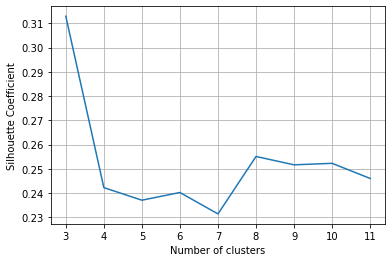

In [76]:
# USING SC SCORE 5 CLUSTER SOLUTION IS COMING OUT TO BE BEST 
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### ELBOW ANALYSIS

In [81]:
cluster_range = range( 3, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters ).fit( credit_data_final )
    cluster_errors.append( clusters.inertia_ )

In [82]:
clusters_df = pd.DataFrame( { "num_clusters": cluster_range, "cluster_errors": cluster_errors } )
clusters_df[ 0:10 ]

,num_clusters,cluster_errors
0,3,83821.643597
1,4,70615.318438
2,5,61978.204674
3,6,56597.076932
4,7,52529.641090
5,8,48923.226432
6,9,45425.079745
7,10,42905.473162
8,11,41273.875553
9,12,39748.581432


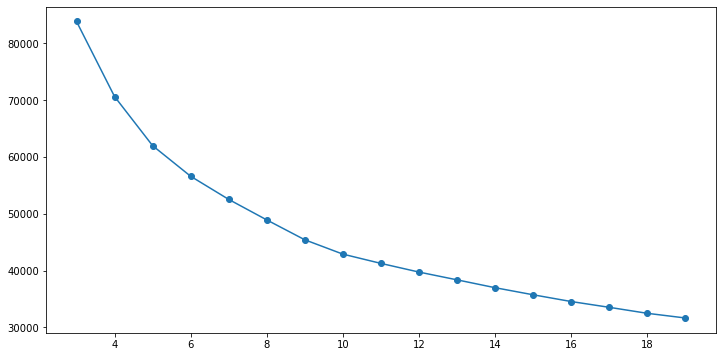

In [83]:
# 5 OR 6 CLUSTER SOLUTION SEEMS TO BE OPTIMUM SINCE AFTER THAT THE CURVE IS FLATTENING VERY FAST
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

### PROFILING : QUALITATIVE ANALYSIS

In [86]:
size = pd.concat( [pd.Series( credit_data.shape[0] ), 
                   pd.Series.sort_index(credit_data.CLUSTER_3.value_counts()), 
                   pd.Series.sort_index(credit_data.CLUSTER_4.value_counts()),
                   pd.Series.sort_index(credit_data.CLUSTER_5.value_counts()), 
                   pd.Series.sort_index(credit_data.CLUSTER_6.value_counts()),
                   pd.Series.sort_index(credit_data.CLUSTER_7.value_counts()), 
                   pd.Series.sort_index(credit_data.CLUSTER_8.value_counts()),
                   pd.Series.sort_index(credit_data.CLUSTER_9.value_counts())]
                )

In [87]:
size

0    8950
0    1667
1    1182
2    6101
0    1251
1    3124
2     706
3    3869
0    2754
1     665
2    1877
3    2664
4     990
0    1194
1    2674
2    1932
3    1797
4     988
5     365
0    1175
1    1540
2    1867
3    2355
4    1212
5     446
6     355
0    1469
1    1503
2     706
3     906
4    1092
5    2382
6     543
7     349
0    1074
1    1035
2     346
3    1253
4    2212
5     639
6    1466
7     525
8     400
dtype: int64

In [88]:
Seg_size = pd.DataFrame( size, columns = ['Seg_size'] )
Seg_Pct = pd.DataFrame( size / credit_data.shape[0], columns = ['Seg_Pct'] )

In [89]:
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,7,0,1,2,3,4,5,6,7,8
Seg_size,8950,1667,1182,6101,1251,3124,706,3869,2754,665,...,349,1074,1035,346,1253,2212,639,1466,525,400


In [90]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,7,0,1,2,3,4,5,6,7,8
Seg_Pct,1.0,0.186257,0.132067,0.681676,0.139777,0.34905,0.078883,0.432291,0.307709,0.074302,...,0.038994,0.12,0.115642,0.038659,0.14,0.247151,0.071397,0.163799,0.058659,0.044693


In [91]:
pd.concat( [Seg_size.T, Seg_Pct.T], axis = 0 )

,0,0,1,2,0,1,2,3,0,1,...,7,0,1,2,3,4,5,6,7,8
Seg_size,8950.0,1667.000000,1182.000000,6101.000000,1251.000000,3124.00000,706.000000,3869.000000,2754.000000,665.000000,...,349.000000,1074.00,1035.000000,346.000000,1253.00,2212.000000,639.000000,1466.000000,525.000000,400.000000
Seg_Pct,1.0,0.186257,0.132067,0.681676,0.139777,0.34905,0.078883,0.432291,0.307709,0.074302,...,0.038994,0.12,0.115642,0.038659,0.14,0.247151,0.071397,0.163799,0.058659,0.044693


In [92]:
# Mean value gives a good indication of the distribution of data. 
# So we are finding mean value for each variable for each cluster
Profling_output = pd.concat( [credit_data.apply(lambda x: x.mean()).T, 
                              credit_data.groupby('CLUSTER_3').apply(lambda x: x.mean()).T, 
                              credit_data.groupby('CLUSTER_4').apply(lambda x: x.mean()).T,
                              credit_data.groupby('CLUSTER_5').apply(lambda x: x.mean()).T, 
                              credit_data.groupby('CLUSTER_6').apply(lambda x: x.mean()).T,
                              credit_data.groupby('CLUSTER_7').apply(lambda x: x.mean()).T, 
                              credit_data.groupby('CLUSTER_8').apply(lambda x: x.mean()).T,
                              credit_data.groupby('CLUSTER_9').apply(lambda x: x.mean()).T], axis = 1 )

In [93]:
Profling_output_final = pd.concat( [Seg_size.T, Seg_Pct.T, Profling_output], axis = 0 ).round(2)

In [94]:
Profling_output_final.head()

,0,0,1,2,0,1,2,3,0,1,...,7,0,1,2,3,4,5,6,7,8
Seg_size,8950.00,1667.00,1182.00,6101.00,1251.00,3124.00,706.00,3869.00,2754.00,665.00,...,349.00,1074.00,1035.00,346.00,1253.00,2212.00,639.00,1466.00,525.00,400.00
Seg_Pct,1.00,0.19,0.13,0.68,0.14,0.35,0.08,0.43,0.31,0.07,...,0.04,0.12,0.12,0.04,0.14,0.25,0.07,0.16,0.06,0.04
BALANCE,1541.05,3760.47,2228.39,801.46,4260.10,704.02,2845.76,1099.64,1873.04,2879.53,...,3597.90,1160.64,3296.62,3585.97,125.90,1416.27,2691.01,233.51,689.67,5446.51
BALANCE_FREQUENCY,0.88,0.95,0.98,0.84,0.96,0.91,0.98,0.81,0.98,0.98,...,0.99,0.97,0.96,0.99,0.45,0.98,0.99,0.90,0.77,0.96
PURCHASES,936.23,352.07,4000.50,502.17,433.26,1039.76,5114.79,252.78,253.84,5251.83,...,6699.29,2407.96,227.16,6700.91,313.30,261.35,1096.90,747.00,323.03,758.00


In [96]:
Profling_output_final.to_csv(path + 'Profling_output_final.csv')